# KNearestNeighborを実装しちゃうぞ

# kNearestNeighborとは
## 教師あり（付き）学習の分類問題
### 教師信号として特徴ベクトルと正解ラベルが与えられるものをいう。 その教師信号を元に、未知の特徴ベクトルが与えられたときに正解ラベルを予想しましょう、というもの。

In [6]:
# k = 1 最近傍法
import numpy as np
from sklearn import datasets
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

class NearstNeighbors(object):
    
    def __init__(self):
        self._train_data = None
        self._target_data = None
    
    def fit(self, train_data, target_data):
        self._train_data = train_data
        self._target_data = target_data
        
    def predict(self, x):
        # 判別する点と教師データとのユークリッド距離を計算する
        distances = np.array([self._distance(p, x) for p in self._train_data])
        
        # 最もユークリッド距離の近い要素のインデックスを得る
        nearest_index = distances.argmin()
        # 最も近い要素のラベルを返す
        return self._target_data[nearest_index]
    
    def _distance(self, p0, p1):
        """
        二点間のユークリッド距離を計算する
        """
        return np.sum((p0 - p1) ** 2)

def main():
    # iris データセットをロードする
    iris_dataset = datasets.load_iris()
    
    # 特徴データセットとラベルデータを取り出す
    features = iris_dataset.data
    targets = iris_dataset.target
    
    # LOO法で汎化性能を調べる
    predicted_labels = []
    
    loo = LeaveOneOut()
    for train, test in loo.split(features):
        train_data = features[train]
        target_data = targets[train]
        # モデルを学習させる
        model = NearstNeighbors()
        model.fit(train_data, target_data)
        
        # １つ抜いたテストデータを識別させる
        predicted_label = model.predict(features[test])
        predicted_labels.append(predicted_label)
    # 正解率を出力する
    score = accuracy_score(targets, predicted_labels)
    print(score)
    
if __name__ == "__main__":
    main()

0.96


In [ ]:
from collections import Counter

import numpy as np

from sklearn import datasets
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score


class KNearestNeighbors(object):

    def __init__(self, k=1):
        self._train_data = None
        self._target_data = None
        self._k = k

    def fit(self, train_data, target_data):
        """訓練データを学習する"""
        # あらかじめ計算しておけるものが特にないので保存だけする
        self._train_data = train_data
        self._target_data = target_data

    def predict(self, x):
        """訓練データから予測する"""
        # 判別する点と教師データとのユークリッド距離を計算する
        distances = np.array([self._distance(p, x) for p in self._train_data])
        # ユークリッド距離の近い順でソートしたインデックスを得る
        nearest_indexes = distances.argsort()[:self._k]
        # 最も近い要素のラベルを返す
        nearest_labels = self._target_data[nearest_indexes]
        # 近傍のラベルで一番多いものを予測結果として返す
        c = Counter(nearest_labels)
        return c.most_common(1)[0][0]

    def _distance(self, p0, p1):
        """二点間のユークリッド距離を計算する"""
        return np.sum((p0 - p1) ** 2)


def main():
    iris_dataset = datasets.load_iris()

    features = iris_dataset.data
    targets = iris_dataset.target

    predicted_labels = []

    loo = LeaveOneOut()
    for train, test in loo.split(features):
        train_data = features[train]
        target_data = targets[train]

        model = KNearestNeighbors(k=3)
        model.fit(train_data, target_data)

        predicted_label = model.predict(features[test])
        predicted_labels.append(predicted_label)

    score = accuracy_score(targets, predicted_labels)
    print(score)


if __name__ == '__main__':
    main()

# 参考文献
## http://blog.amedama.jp/entry/2017/03/18/140238
## https://qiita.com/NoriakiOshita/items/698056cb74819624461f

k=1: 0.96
k=2: 0.9466666666666667
k=3: 0.96
k=4: 0.96
k=5: 0.9666666666666667
k=6: 0.96
k=7: 0.9666666666666667
k=8: 0.9666666666666667
k=9: 0.9666666666666667
k=10: 0.9733333333333334
k=11: 0.9733333333333334
k=12: 0.96
k=13: 0.9666666666666667
k=14: 0.9733333333333334
k=15: 0.9733333333333334
k=16: 0.9666666666666667
k=17: 0.9733333333333334
k=18: 0.9733333333333334
k=19: 0.98
k=20: 0.98


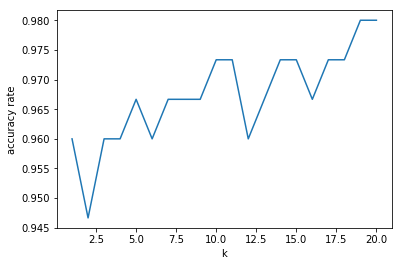

In [13]:
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


def main():
    # データセットをロードする
    # dataset = datasets.load_digits()
    dataset = datasets.load_iris()

    # 特徴データとラベルデータを取り出す
    features = dataset.data
    targets = dataset.target

    # 検証する近傍数の上限
    K = 20
    ks = range(1, K + 1)

    # 使う近傍数ごとに正解率を計算する
    accuracy_scores = []
    for k in ks:
        # Leave-One-Out 法で汎化性能を測る
        predicted_labels = []
        loo = LeaveOneOut()
        for train, test in loo.split(features):
            train_data = features[train]
            target_data = targets[train]

            # モデルを学習させる    
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(train_data, target_data)
    
            # 一つだけ取り除いたテストデータを識別させる
            predicted_label = model.predict(features[test])
            predicted_labels.append(predicted_label)
    
        # 正解率を計算する
        score = accuracy_score(targets, predicted_labels)
        print('k={0}: {1}'.format(k, score))

        accuracy_scores.append(score)

    # 使う近傍数ごとの正解率を折れ線グラフで可視化する
    X = list(ks)
    plt.plot(X, accuracy_scores)

    plt.xlabel('k')
    plt.ylabel('accuracy rate')
    plt.show()
    

if __name__ == '__main__':
    main()

1
2
3
4
